This notebook contains an attempt at modeling for our first run at clean training data.

In [79]:
# IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# modeling function import
from model import modeling_reg

# import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

# imports for classifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

In [45]:
# read in data for batters and pitchers
batters = pd.read_csv('Modeling_Data/batter_data_modeling.csv')

Testing across multiple regressors from sklearn to gage starting point.

In [46]:
# instaniate all models
linreg = LinearRegression()
knn = KNeighborsRegressor()
svc = SVR()
forest = RandomForestRegressor()
tree = DecisionTreeRegressor()
abc = AdaBoostRegressor()
bag = BaggingRegressor()

In [47]:
# create list of classifiers
class_list = [linreg, knn, svc, forest, tree, abc, bag]

In [48]:
batters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    636 non-null    object 
 1   Team    636 non-null    object 
 2   POS     636 non-null    object 
 3   GMS     636 non-null    float64
 4   AB      636 non-null    float64
 5   R       636 non-null    float64
 6   H       636 non-null    float64
 7   2B      636 non-null    float64
 8   3B      636 non-null    float64
 9   HR      636 non-null    float64
 10  RBI     636 non-null    float64
 11  BB      636 non-null    float64
 12  SO      636 non-null    float64
 13  SB      636 non-null    float64
 14  CS      636 non-null    float64
 15  PTS     636 non-null    float64
 16  TB      636 non-null    float64
 17  AVG     636 non-null    float64
 18  SLG     636 non-null    float64
 19  OBP     636 non-null    float64
 20  OPS     636 non-null    float64
 21  FPPG    636 non-null    float64
dtypes:

In [49]:
# set X , y 
X = batters.drop(columns=['Name','Team','POS','FPPG', 'PTS'])
y = batters['FPPG']

In [50]:
# TTS
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [51]:
# create results df using modeling fuction that fits and scores each model
results = modeling_reg(X_train, X_test, y_train, y_test, class_list)

In [52]:
# print results
results

,train_score,test_score,RMSE
LinearRegression(),0.938009,0.908803,0.929074
KNeighborsRegressor(),0.932538,0.900074,0.972524
SVR(),0.857160,0.831397,1.263262
RandomForestRegressor(),0.987586,0.919786,0.871337
DecisionTreeRegressor(),1.000000,0.846204,1.206518
AdaBoostRegressor(),0.926350,0.880437,1.063799
BaggingRegressor(),0.982569,0.916792,0.887450


In [80]:
batters['FPPG'].mean()

7.076754267130587

In [81]:
batters['Proj_FPPG'] = linreg.predict(X)

In [82]:
batters['Proj_FPPG'].mean()

7.079387210148967

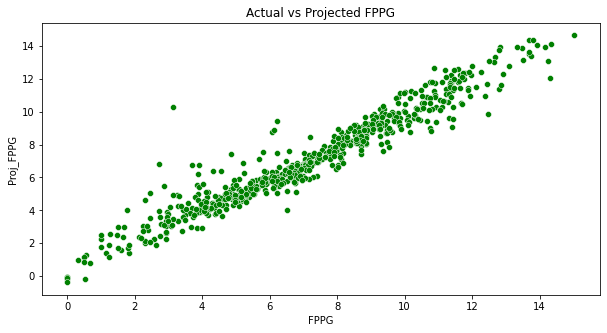

In [83]:
# plot prpjections against actuals
plt.figure(figsize=(10,5))
sns.scatterplot(x=batters['FPPG'], y=batters['Proj_FPPG'], color='green')
plt.title('Actual vs Projected FPPG');

Really good model how does it do on truely unseen data.

In [84]:
# read in clean testing data
batter_21 = pd.read_csv('Modeling_Data/batter_test_data.csv')

In [85]:
# drop columns so as to same shape as X
testing = batter_21.drop(columns=['Name','TEAM','POS','FPPG', 'PTS'])

In [88]:
# create projections for testing (2021) data based on model fit with train (2019-2020)
batter_21['Proj_FPPG'] = linreg.predict(testing)

In [89]:
# baseline mean of 2021 data
batter_21['FPPG'].mean()

7.006965259320823

In [90]:
# projected mean of 2021 data
batter_21['Proj_FPPG'].mean()

5.805438775188082

In [94]:
# RMSE
mean_squared_error(batter_21['FPPG'], batter_21['Proj_FPPG'], squared=False)

2.5359834631060902

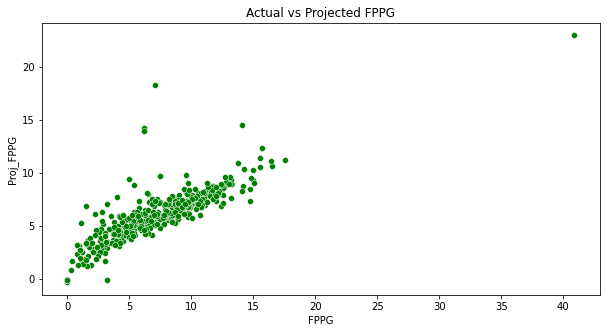

In [91]:
# plot prpjections against actuals testing data
plt.figure(figsize=(10,5))
sns.scatterplot(x=batter_21['FPPG'], y=batter_21['Proj_FPPG'], color='green')
plt.title('Actual vs Projected FPPG');

In [77]:
# check out outlier
batter_21.loc[batter_21['Proj_FPPG']>19]

,Name,TEAM,POS,GMS,AB,R,H,2B,3B,HR,...,SB,CS,TB,AVG,OBP,SLG,OPS,PTS,FPPG,Proj_FPPG
376,Jacob Nottingham,MIL,C,1,4,2,2,0,0,2,...,0,0,8,0.5,0.5,2.0,2.5,40.9,40.9,22.957842


In [113]:
# dataframe of coefs
coef_df = pd.DataFrame(zip(X.columns, linreg.coef_), columns=['Feature', 'Coeficient'])
coef_df.sort_values(by='Coeficient', inplace=True)

In [114]:
coef_df

,Feature,Coeficient
13,AVG,-10.240518
0,GMS,-0.048153
12,TB,-0.017812
5,3B,-0.017517
4,2B,-0.005585
11,CS,-0.005072
8,BB,0.000538
3,H,0.002190
9,SO,0.004544
6,HR,0.006872
